In [146]:
import pandas as pd
import matplotlib.pyplot as plt


df = pd.read_csv('Cars_Datasets_2025.csv', encoding='windows-1252')

df.describe() #funzione describe



,Company Names,Cars Names,Engines,CC/Battery Capacity,HorsePower,Total Speed,Performance(0 - 100 )KM/H,Cars Prices,Fuel Types,Seats,Torque
count,1218,1218,1218,1215,1218,1218,1212,1218,1218,1218,1217
unique,37,1201,356,311,456,114,180,535,23,19,263
top,Nissan,Polo BlueMotion,I4,1984 cc,355 hp,250 km/h,6.5 sec,"$35,000",Petrol,5,400 Nm
freq,149,2,64,31,23,145,45,36,871,692,72


In [147]:
# Rimuove i null prima di convertire
df_clean = df.dropna()

# Conversioni sulle colonne pulite
df_clean['HorsePower_numeric'] = df_clean['HorsePower'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
df_clean['Total_Speed_numeric'] = df_clean['Total Speed'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
# Cars Prices: estrai solo la parte numerica (es. da "$35,000" → 35000)
df_clean['Cars_Prices_numeric'] = df_clean['Cars Prices'].astype(str).str.extract('(\d+\.?\d*)').astype(float)

df_clean['Torque_numeric'] = df_clean['Torque'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
df_clean['CC_Battery_numeric'] = df_clean['CC/Battery Capacity'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
df_clean['Performance_numeric'] = df_clean['Performance(0 - 100 )KM/H'].astype(str).str.extract('(\d+\.?\d*)').astype(float)

# Statistiche descrittive
print(df_clean[['HorsePower_numeric', 'Total_Speed_numeric', 'Cars_Prices_numeric', 'Torque_numeric', 'CC_Battery_numeric', 'Performance_numeric']].describe())




       HorsePower_numeric  Total_Speed_numeric  Cars_Prices_numeric  \
count         1210.000000          1210.000000          1210.000000   
mean           298.766116           216.848760            68.919008   
std            210.197927            52.719519            89.059659   
min              1.000000            80.000000             1.000000   
25%            150.000000           180.000000            26.000000   
50%            250.000000           200.000000            40.000000   
75%            400.000000           250.000000            67.000000   
max           1850.000000           500.000000           750.000000   

       Torque_numeric  CC_Battery_numeric  Performance_numeric  
count     1210.000000         1208.000000          1210.000000  
mean       425.580992         1419.376490             7.561736  
std        290.871328         2025.457147             3.305406  
min          1.000000            1.000000             1.900000  
25%        250.000000            2.

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:8: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:12: SyntaxWarning: invalid escape sequence '\d'
C:\Users\sorre\AppData\Local\Temp\ipykernel_10120\1758864154.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_clean['HorsePower_numeric'] = df_clean['HorsePower'].astype(str).str.extract('(\d+\.?\d*)').astype(float)
C:\Users\sorre\AppData\Local\Temp\ipykernel_10120\1758864154.py:6: SyntaxWarning: invalid escape sequence '\d'
  df_clean['Total_Speed_numeric'] = df_clean['Total Speed'].a

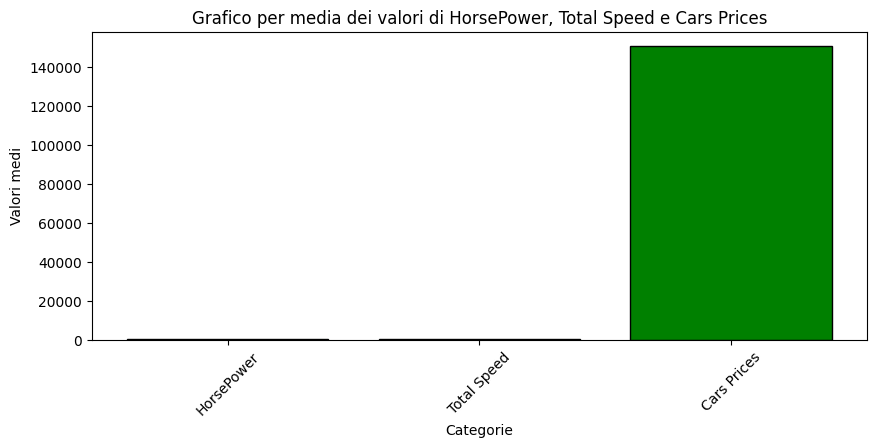

In [148]:
# HorsePower: togli " hp"
df['HorsePower'] = df['HorsePower'].str.replace(' hp','', regex=False)
df['HorsePower'] = pd.to_numeric(df['HorsePower'], errors='coerce')

# Total Speed: togli " km/h"
df['Total Speed'] = df['Total Speed'].str.replace(' km/h','', regex=False)
df['Total Speed'] = pd.to_numeric(df['Total Speed'], errors='coerce')

# Cars Prices: togli "$" e ","
df['Cars Prices'] = df['Cars Prices'].str.replace('$','', regex=False).str.replace(',','', regex=False)
df['Cars Prices'] = pd.to_numeric(df['Cars Prices'], errors='coerce')


mean_values = df[['HorsePower', 'Total Speed', 'Cars Prices']].mean()

categories = ['HorsePower', 'Total Speed', 'Cars Prices']


values = [mean_values[col] for col in categories]

plt.figure(figsize=(10,4))
plt.bar(categories, values, color="green", edgecolor="black")
plt.title("Grafico per media dei valori di HorsePower, Total Speed e Cars Prices")
plt.xlabel("Categorie") # Etichetta asse X
plt.ylabel("Valori medi") # Etichetta asse Y
plt.xticks(rotation=45) # Ruota le etichette sull'asse X di 45° per leggibilità
plt.show() # Visualizza il grafico





📊 Colonna: HorsePower
Outlier rilevati: 18
Percentuale: 1.90%


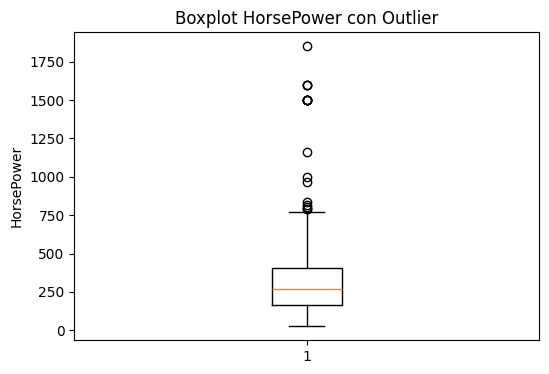


📊 Colonna: Total Speed
Outlier rilevati: 13
Percentuale: 1.07%


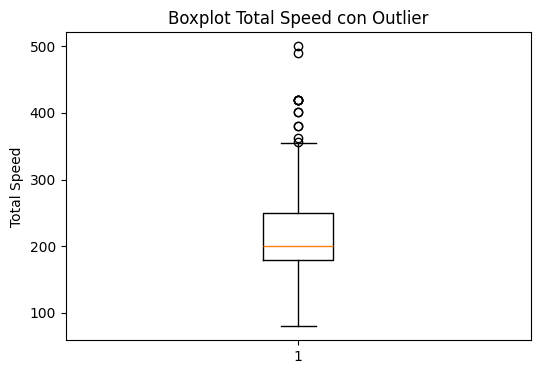


📊 Colonna: Cars Prices
Outlier rilevati: 128
Percentuale: 12.26%


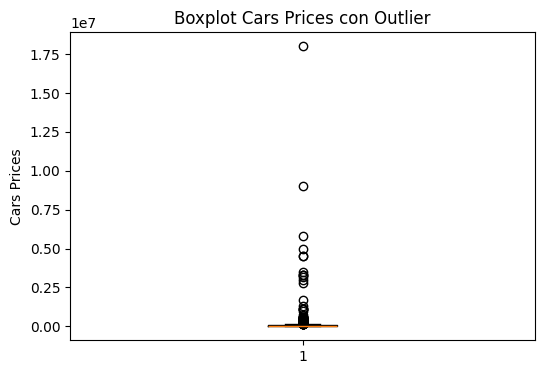

In [149]:
import matplotlib.pyplot as plt

# Seleziona solo le colonne numeriche
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Ciclo su ogni colonna numerica
for col in numeric_cols:
    # Rimuovi i NaN temporaneamente
    data = df[col].dropna()

    # Calcolo IQR
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Trova gli outlier
    outliers = data[(data < lower_bound) | (data > upper_bound)]

    # Stampa risultati
    print(f"\n📊 Colonna: {col}")
    print(f"Outlier rilevati: {len(outliers)}")
    print(f"Percentuale: {len(outliers)/len(data)*100:.2f}%")

    # Visualizza boxplot
    plt.figure(figsize=(6, 4))
    plt.boxplot(data)
    plt.title(f"Boxplot {col} con Outlier")
    plt.ylabel(col)
    plt.show()




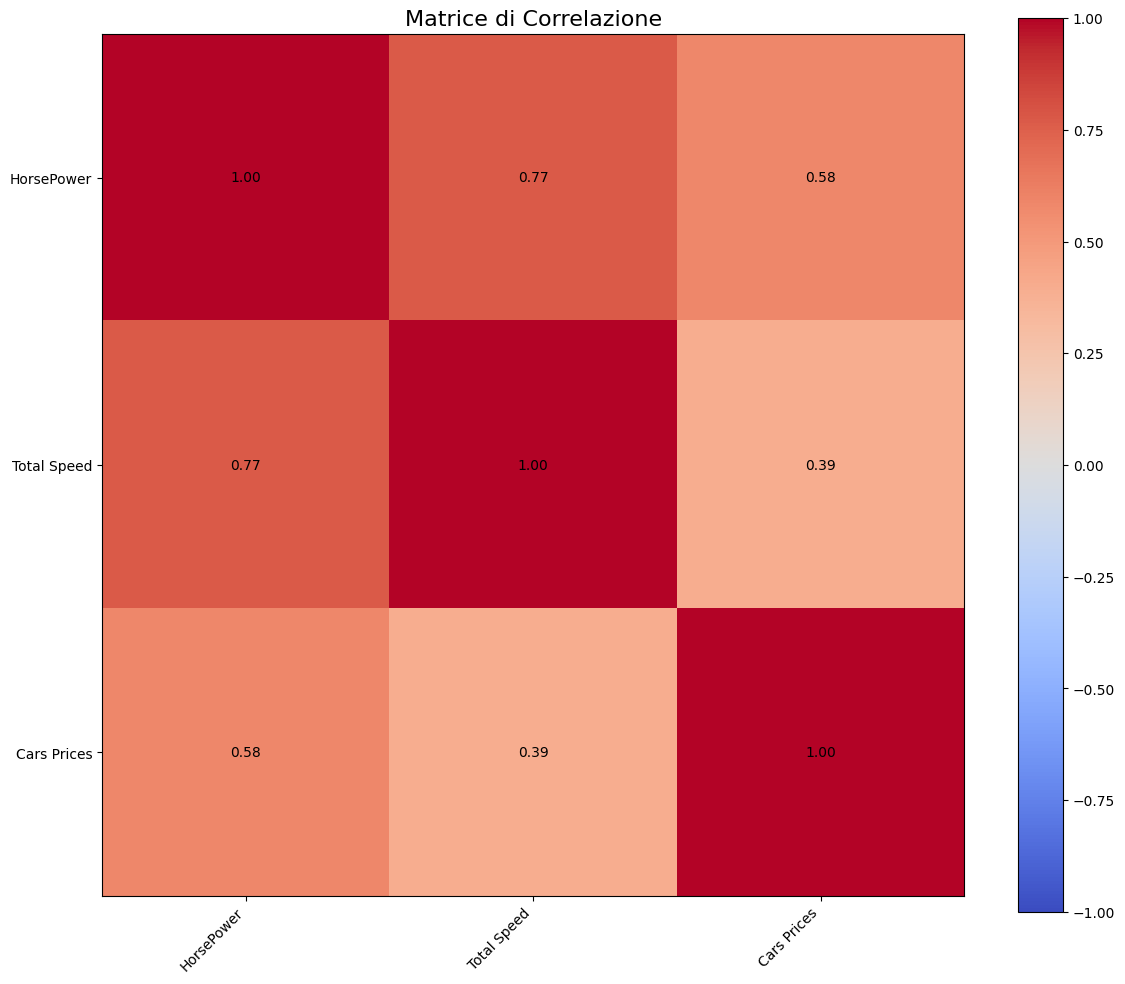

In [150]:
import numpy as np

# 1. Seleziona solo le colonne numeriche
df_num = df.select_dtypes(include=['float64', 'int64'])

# 2. Calcola la matrice di correlazione
corr_matrix = df_num.corr()

# 3. Setup della figura
fig, ax = plt.subplots(figsize=(12, 10))

# 4. Visualizzazione con imshow
cax = ax.imshow(corr_matrix, cmap='coolwarm', vmin=-1, vmax=1)

# 5. Etichette degli assi
ax.set_xticks(np.arange(len(corr_matrix.columns)))
ax.set_yticks(np.arange(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=45, ha='right')
ax.set_yticklabels(corr_matrix.columns)

# 6. Annotazioni dei valori
for i in range(len(corr_matrix.columns)):
    for j in range(len(corr_matrix.columns)):
        value = corr_matrix.iloc[i, j]
        ax.text(j, i, f"{value:.2f}", ha='center', va='center', color='black')

# 7. Barra dei colori
fig.colorbar(cax)

# 8. Titolo
plt.title('Matrice di Correlazione', fontsize=16)
plt.tight_layout()
plt.show()


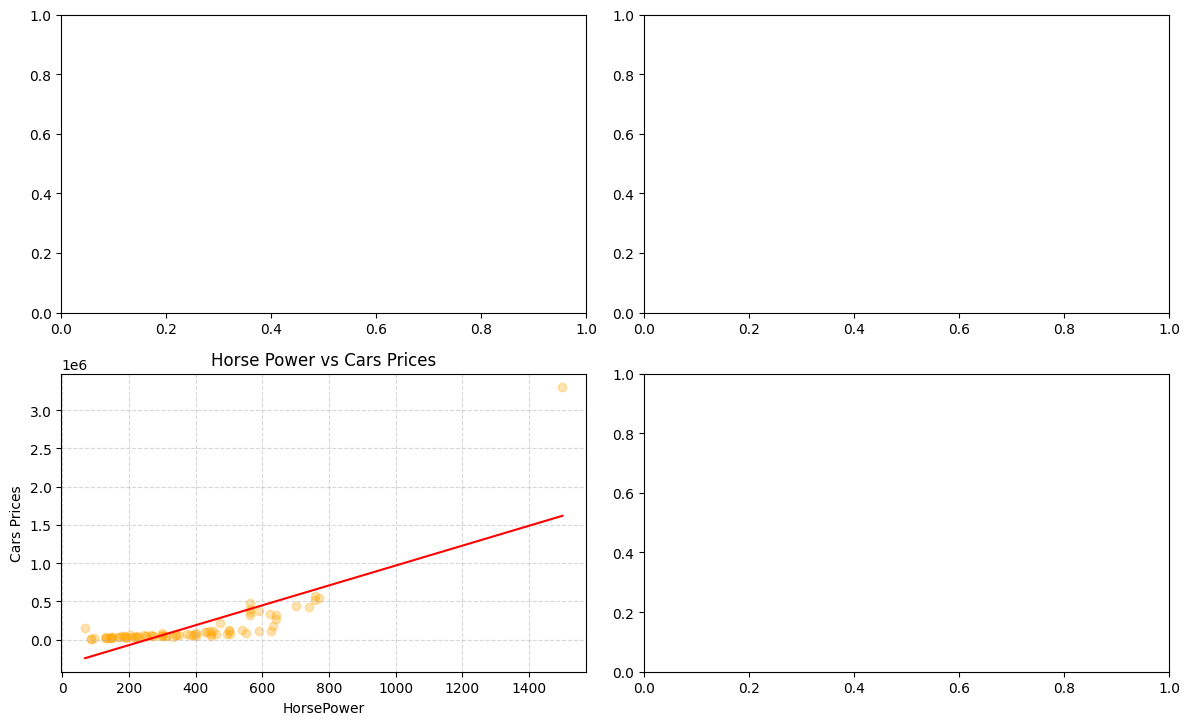

In [151]:
import matplotlib.pyplot as plt
import numpy as np

df_sample = df.sample(frac=0.1, random_state=42)

# Converti in numerico e rimuovi valori non validi
x = pd.to_numeric(df_sample['HorsePower'], errors='coerce')
y = pd.to_numeric(df_sample['Cars Prices'], errors='coerce')

# Rimuovi NaN e inf
mask = (~x.isna()) & (~y.isna()) & np.isfinite(x) & np.isfinite(y)
x = x[mask]
y = y[mask]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Scatter plot
axes[1, 0].scatter(x, y, alpha=0.3, color='orange')

# Regressione lineare solo se ci sono abbastanza punti
if len(x) > 1:
    m, b = np.polyfit(x, y, 1)
    x_sorted = np.sort(x)
    y_pred = m * x_sorted + b
    axes[1, 0].plot(x_sorted, y_pred, color='red')

# Titolo e assi
axes[1, 0].set_title('Horse Power vs Cars Prices')
axes[1, 0].set_xlabel('HorsePower')
axes[1, 0].set_ylabel('Cars Prices')
axes[1, 0].grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
